In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_parquet("../data/synthetic_events.parquet")
df['ts'] = pd.to_datetime(df['ts'])

In [2]:
# Samples per user
df.groupby('user_id').size().describe()

count     100.000000
mean      997.590000
std       368.655874
min       352.000000
25%       668.000000
50%       990.000000
75%      1440.000000
max      1440.000000
dtype: float64

<Axes: title={'center': 'user 6 battery over time'}, xlabel='ts'>

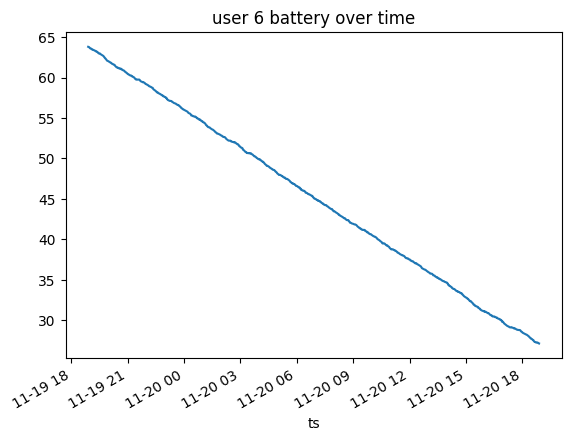

In [3]:
uid = df['user_id'].unique()[5]
sub = df[df['user_id']==uid].set_index('ts')
sub['battery_pct'].plot(title=f"user {uid} battery over time")

array([<Axes: xlabel='ts'>, <Axes: xlabel='ts'>, <Axes: xlabel='ts'>,
       <Axes: xlabel='ts'>], dtype=object)

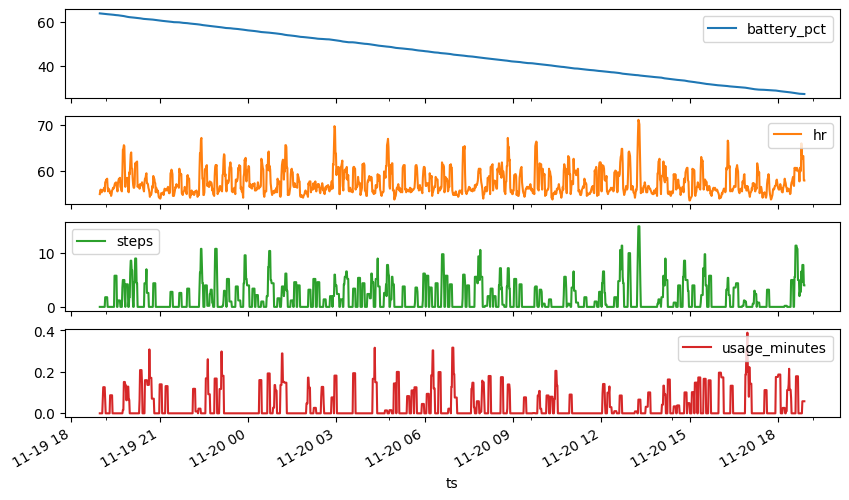

In [4]:
sub[['battery_pct','hr','steps','usage_minutes']].rolling(5).mean().plot(subplots=True, figsize=(10,6))

Text(0.5, 1.0, 'battery_pct dist')

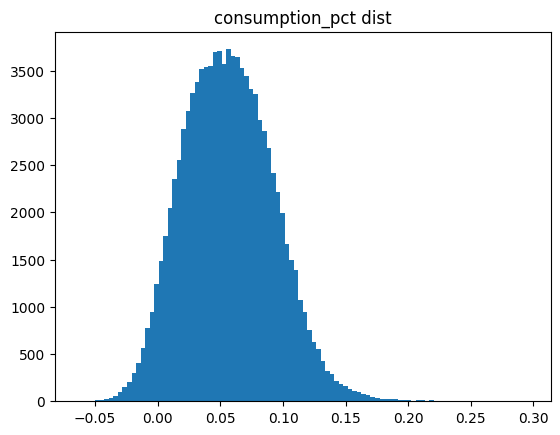

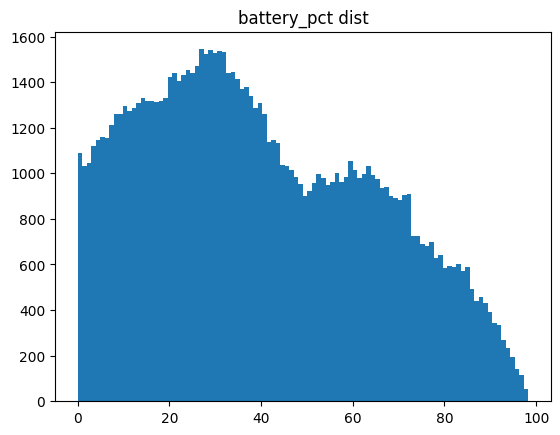

In [5]:
plt.hist(df['consumption_pct'], bins=100); plt.title("consumption_pct dist")
plt.figure(); plt.hist(df['battery_pct'], bins=100); plt.title("battery_pct dist")

In [6]:
import sys
import os

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)

print(root_path)

/home/joel/Projects/battery-predictor


In [7]:
from src.features.compute_target import compute_time_to_threshold
df_target = compute_time_to_threshold(df[['user_id','ts','battery_pct']])
df = df.merge(df_target[['user_id','ts','target_minutes']], on=['user_id','ts'], how='left')
df_target.head()

,user_id,ts,battery_pct,target_minutes
0,1,2025-11-19 18:54:23.702536,68.394728,863.0
1,1,2025-11-19 18:55:23.702536,68.336909,862.0
2,1,2025-11-19 18:56:23.702536,68.262784,861.0
3,1,2025-11-19 18:57:23.702536,68.175523,860.0
4,1,2025-11-19 18:58:23.702536,68.112043,859.0


In [8]:
df.head()

,user_id,ts,battery_pct,hr,steps,usage_minutes,sync_event,acc_x,acc_y,acc_z,consumption_pct,target_minutes
0,1,2025-11-19 18:54:23.702536,68.394728,72,0,0.00,0,-0.236347,0.113535,-0.101701,0.076796,863.0
1,1,2025-11-19 18:55:23.702536,68.336909,69,0,0.67,0,0.088583,0.063190,0.004026,0.057820,862.0
2,1,2025-11-19 18:56:23.702536,68.262784,68,0,0.00,0,-0.017243,-0.087786,0.004221,0.074124,861.0
3,1,2025-11-19 18:57:23.702536,68.175523,72,0,0.00,0,-0.045452,-0.008534,0.150319,0.087261,860.0
4,1,2025-11-19 18:58:23.702536,68.112043,70,0,0.00,0,-0.091545,-0.006973,-0.084995,0.063480,859.0


Text(0.5, 1.0, 'time to 10%')

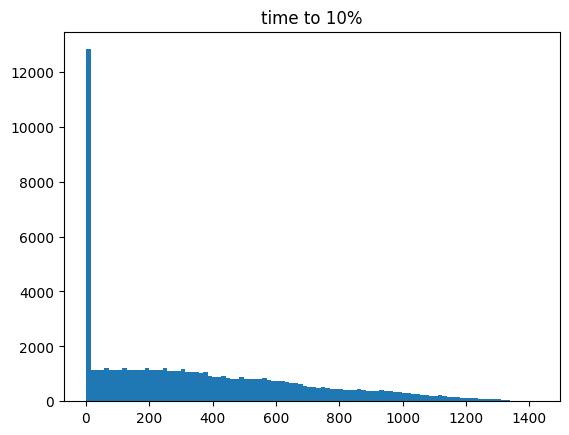

In [9]:
df['target_minutes'].dropna().describe()
plt.hist(df['target_minutes'].dropna(), bins=100); plt.title("time to 10%")

In [10]:
# take rows with non-null target, show example rows with features
ex = df[df['target_minutes'].notna()].sample(10)
ex[['user_id','ts','battery_pct','hr','steps','usage_minutes','target_minutes']].head()

,user_id,ts,battery_pct,hr,steps,usage_minutes,target_minutes
69084,70,2025-11-20 12:22:23.702536,12.328896,71,0,0.0,113.0
86592,89,2025-11-19 21:59:23.702536,77.654524,56,0,0.0,1150.0
83257,86,2025-11-19 23:19:23.702536,72.309404,67,0,0.0,714.0
25175,27,2025-11-20 06:07:23.702536,43.123768,71,0,0.0,469.0
28711,30,2025-11-20 05:06:23.702536,36.413596,74,0,0.0,530.0
